# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,10)

# Data

In [6]:
book=pd.read_csv('book2.csv',encoding='Latin1',index_col=0)
book

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


# EDA

In [9]:
book.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [11]:
book.isna().sum() # check for null fields

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [12]:
book.rename(columns={'User.ID':'UserId',
                  'Book.Title':'BookTitle',
                  'Book.Rating':'BookRating'},inplace=True)
book

,UserId,BookTitle,BookRating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [13]:
# Unique value
book.nunique()

UserId        2182
BookTitle     9659
BookRating      10
dtype: int64

In [14]:
# unique users
book['UserId'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [16]:
len(book['BookTitle'].unique()) # total unique titles in our dataset

9659

In [17]:
# unique ratings
book['BookRating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [19]:
len(book['BookRating'].unique()) # rating value range

10

In [20]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserId      10000 non-null  int64 
 1   BookTitle   10000 non-null  object
 2   BookRating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


# Visualizations

Text(0.5, 1.0, 'BookRating Distribution')

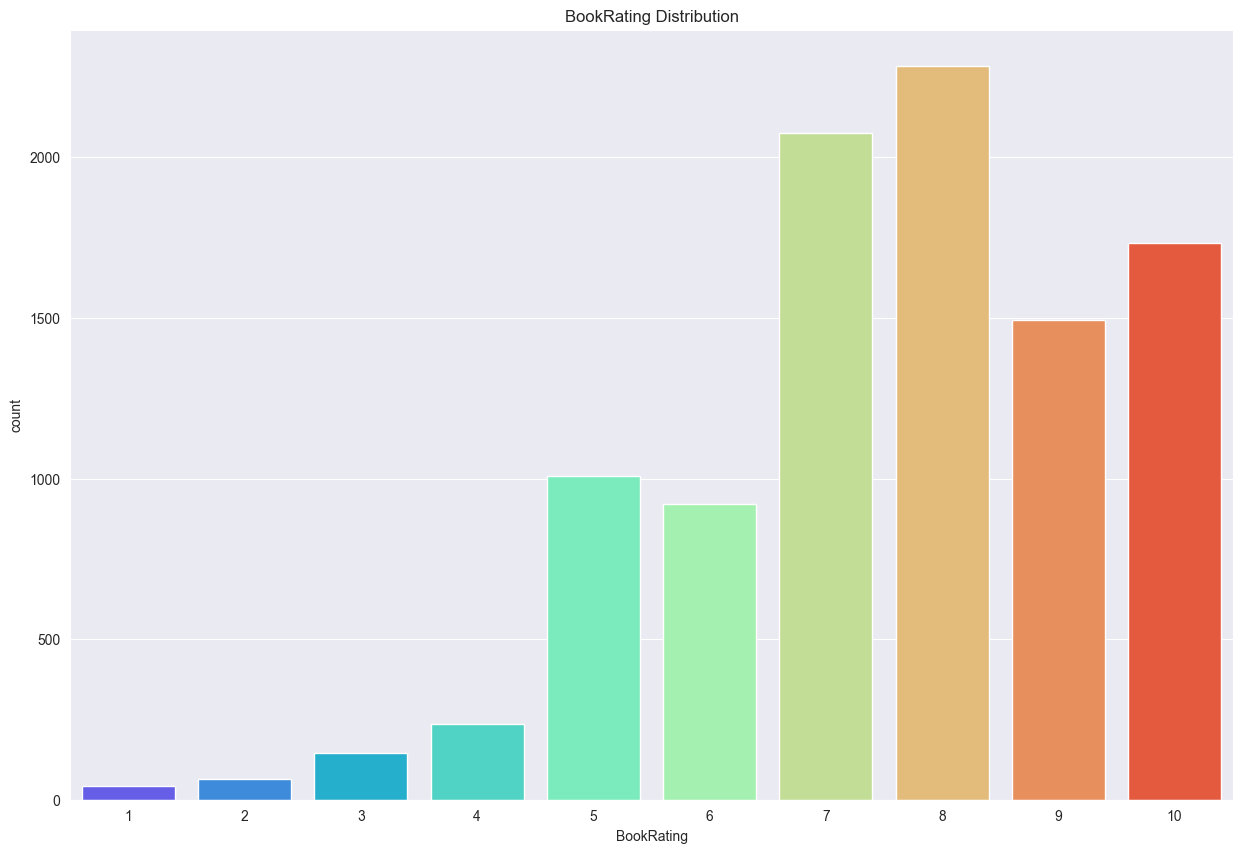

In [21]:
sns.countplot(book,x='BookRating',palette='rainbow')
plt.title('BookRating Distribution')

Text(0.5, 1.0, 'BookRating Pie')

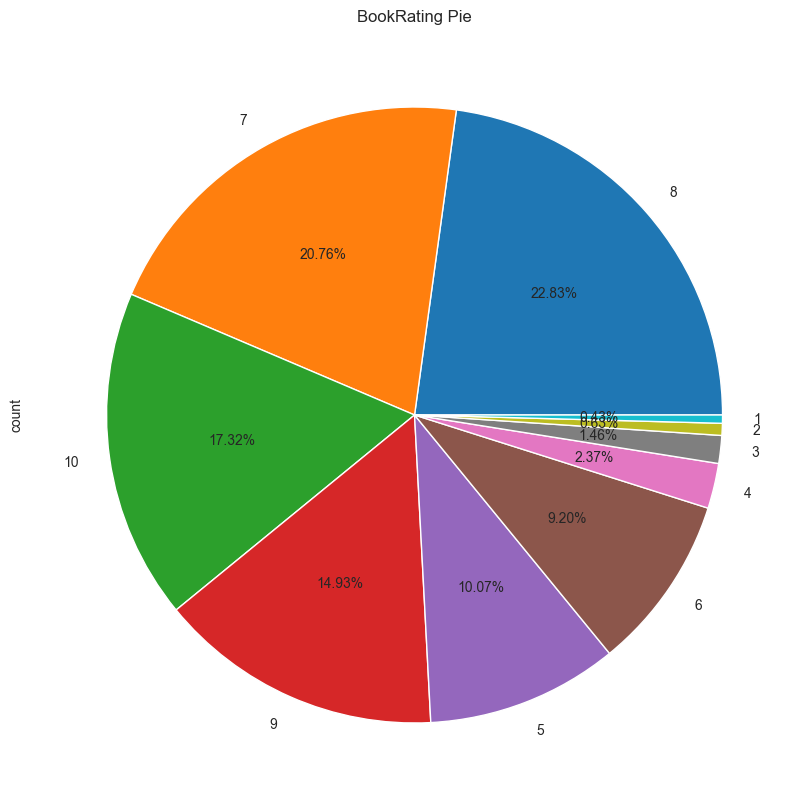

In [22]:
book['BookRating'].value_counts().plot(kind='pie', autopct = '%0.2f%%')
plt.title('BookRating Pie')

# Data Processing

In [23]:
pivot = pd.pivot_table(data=book,index='UserId',columns='BookTitle',values='BookRating')
pivot

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


<h3 style="color:blue; font-family: Arial;"> Note : These NaN values are due to not every user has rated every book so for the books user have not rated we get NaN
Replace these NaN fields with 0</h3>


In [25]:
pivot.fillna(0,inplace=True)
pivot

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


# Calculating cosine similarity

In [26]:
cos_sim = 1 - pairwise_distances(pivot,metric='cosine')
cos_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
sim_df = pd.DataFrame(cos_sim)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
#Set the index and column names to user ids 
sim_df.index = pivot.index.unique()
sim_df.columns = pivot.index.unique()
sim_df

UserId,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
UserId,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h3 style="color:blue; font-family: Arial;"> Note : The Diagonals are not significant since it represents the similarity between itself</h3>

In [29]:
np.fill_diagonal(sim_df.values,0)
sim_df

UserId,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
UserId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Max similar users 
max_sim_user = pd.DataFrame(sim_df.idxmax())
max_sim_user

,0
UserId,
8,8
9,8
10,8
12,8
14,8
...,...
278846,8
278849,8
278851,278202


In [31]:
max_sim_user.reset_index(inplace=True)
max_sim_user

,UserId,0
0,8,8
1,9,8
2,10,8
3,12,8
4,14,8
...,...,...
2177,278846,8
2178,278849,8
2179,278851,278202
2180,278852,8


In [32]:
max_sim_user.columns = ['User A','User B']
max_sim_user

,User A,User B
0,8,8
1,9,8
2,10,8
3,12,8
4,14,8
...,...,...
2177,278846,8
2178,278849,8
2179,278851,278202
2180,278852,8


In [33]:
for idx , row in max_sim_user.iterrows():
    cos_sim_scr = sim_df.loc[row['User A'],row['User B']]
    max_sim_user.loc[idx,'Cosine Similarity'] = cos_sim_scr

In [34]:
max_sim_user

,User A,User B,Cosine Similarity
0,8,8,0.000000
1,9,8,0.000000
2,10,8,0.000000
3,12,8,0.000000
4,14,8,0.000000
...,...,...,...
2177,278846,8,0.000000
2178,278849,8,0.000000
2179,278851,278202,0.023464
2180,278852,8,0.000000


In [36]:

max_sim_user.sort_values('Cosine Similarity',ascending=False)

,User A,User B,Cosine Similarity
1100,3951,3952,1.0
427,1559,1326,1.0
1545,162063,705,1.0
2001,278206,276850,1.0
561,2070,278161,1.0
...,...,...,...
794,2854,8,0.0
793,2853,8,0.0
792,2850,8,0.0
791,2844,8,0.0


In [37]:
max_sim_user[max_sim_user['Cosine Similarity']>0] # filters users with similarity between them

,User A,User B,Cosine Similarity
7,19,278418,0.087046
14,51,3757,0.043541
15,53,1996,0.125429
25,82,882,0.174928
26,83,276861,0.308697
...,...,...,...
2138,278694,161831,0.082973
2142,278715,277710,0.240285
2175,278843,277959,0.080630
2176,278844,276813,0.228717


In [39]:
# Check Some Users 
book[(book['UserId']==3951) | (book['UserId']==3952)]

,UserId,BookTitle,BookRating
7793,3951,The Wind in the Willows,7
7794,3952,The Wind in the Willows,3


 <h3 style="color:blue; font-family: Arial;"> Conclusion : Both user have read same book therefore have cosine similarity 1</h3>

In [40]:
book[(book['UserId']==278715) | (book['UserId']==277710)]

,UserId,BookTitle,BookRating
1111,277710,Italian Fever: A Novel,4
1112,277710,One Hundred Years of Solitude,5
1113,277710,The Illustrated Encyclopedia of Buddhist Wisdom,9
1114,277710,Common Phrases: And Where They Come From,5
1115,277710,"Notions And Potions: A Safe, Practical Guide T...",6
1116,277710,Dragonfly in Amber,10
1117,277710,Naked,5
1118,277710,White Teeth,5
1119,277710,Writing Down the Bones,8
1120,277710,"K Is for Killer (Grafton, Sue. Kinsey Millhone...",6


 <h3 style="color:blue; font-family: Arial;"> Conclusion : Both user have read the book naked hence some similarity 1</h3>

In [42]:
max_sim_user[max_sim_user['Cosine Similarity']>0.7] # filter users with high similarity

,User A,User B,Cosine Similarity
28,86,276780,0.707107
179,698,161645,1.000000
180,705,162063,1.000000
253,933,162004,1.000000
359,1326,1559,1.000000
364,1348,2576,0.752577
427,1559,1326,1.000000
561,2070,278161,1.000000
657,2355,277284,1.000000
721,2576,160926,1.000000


In [43]:
book[(book['UserId']==1348) | (book['UserId']==2576)]

,UserId,BookTitle,BookRating
3916,1348,Fantastic Beasts and Where to Find Them,7
3917,1348,Stardust,8
5700,2576,Stardust,10
